In [ ]:
%matplotlib inline

In [ ]:
pip install mxnet

In [ ]:
pip install gluoncv

3. Test with DeepLabV3 Pre-trained Models
======================================

This is a quick demo of using GluonCV DeepLabV3 model on ADE20K dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.


In [ ]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



load the image



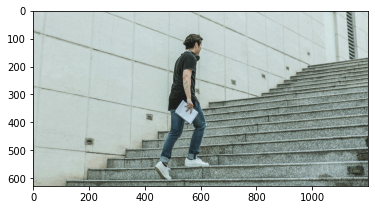

In [ ]:
img = image.imread("/content/man_climbing_steps-1200x628-facebook-1200x628.jpg")

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [ ]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [ ]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

 Make prediction using single scale and Add color for visualization



In [ ]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

# Show the predicted mask



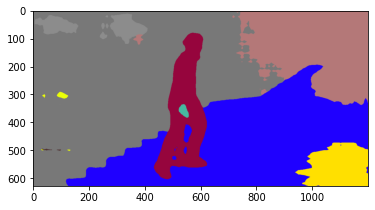

In [ ]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [ ]:
pip install extcolors

In [ ]:
import extcolors
colors, pixel_count = extcolors.extract_from_path("/content/output.png")
print(colors)

[((120, 120, 120), 462523), ((31, 0, 255), 207678), ((150, 5, 61), 50758), ((255, 224, 0), 31516), ((70, 184, 160), 1125)]


In [ ]:
print(colors[0][1]) 

462523
